# Interactive demo of local and global keys in the `justkeydding` algorithm

Load the main module of the python implementation of the algorithm

In [18]:
import main

Set the parameters to be used in the model

In [28]:
key_profile = 'krumhansl_kessler'
key_transition = 'key_transitions_exponential_10'
input_file = 'examples/Solfeggio_in_C_minor.mxl'

kpM = '{}_major'.format(key_profile)
kpm = '{}_minor'.format(key_profile)

Load the file through music21 and extract its note objects

In [29]:
notes_chords_and_rests = main.get_notes_chords_and_rests_from_music21(input_file)
notes = main.get_notes_from_music21(notes_chords_and_rests)
input_sequence = main.get_pc_from_music21(notes)

The parameters are ready, time to run the model

In [30]:
global_key, local_keys = main.analyze(input_sequence, kpM, kpm, key_transition)

Align the local keys with the music21 note objects

In [31]:
color_palette = [
    '#170f07', '#484542', '#897a6c', '#c9b79c', 
    '#fcf5e8', '#6f241d', '#c0460e', '#ee8300',
    '#ffc42d', '#4c2c35', '#8e5340', '#cc8c58',
    '#f7c78b', '#0d4157', '#207949', '#66b632',
    '#c9e251', '#00719d', '#00abc4', '#6fddd5',
    '#632c53', '#b7466c', '#ff7986', '#ffbda9'
]

keys = [
    'C', 'Db', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B',
    'c', 'c#', 'd', 'eb', 'e', 'f', 'f#', 'g', 'ab', 'a', 'bb', 'b',
]

colors = { k: c for k, c in zip(keys, color_palette) }

In [32]:
print(len(notes) == len(local_keys))

True


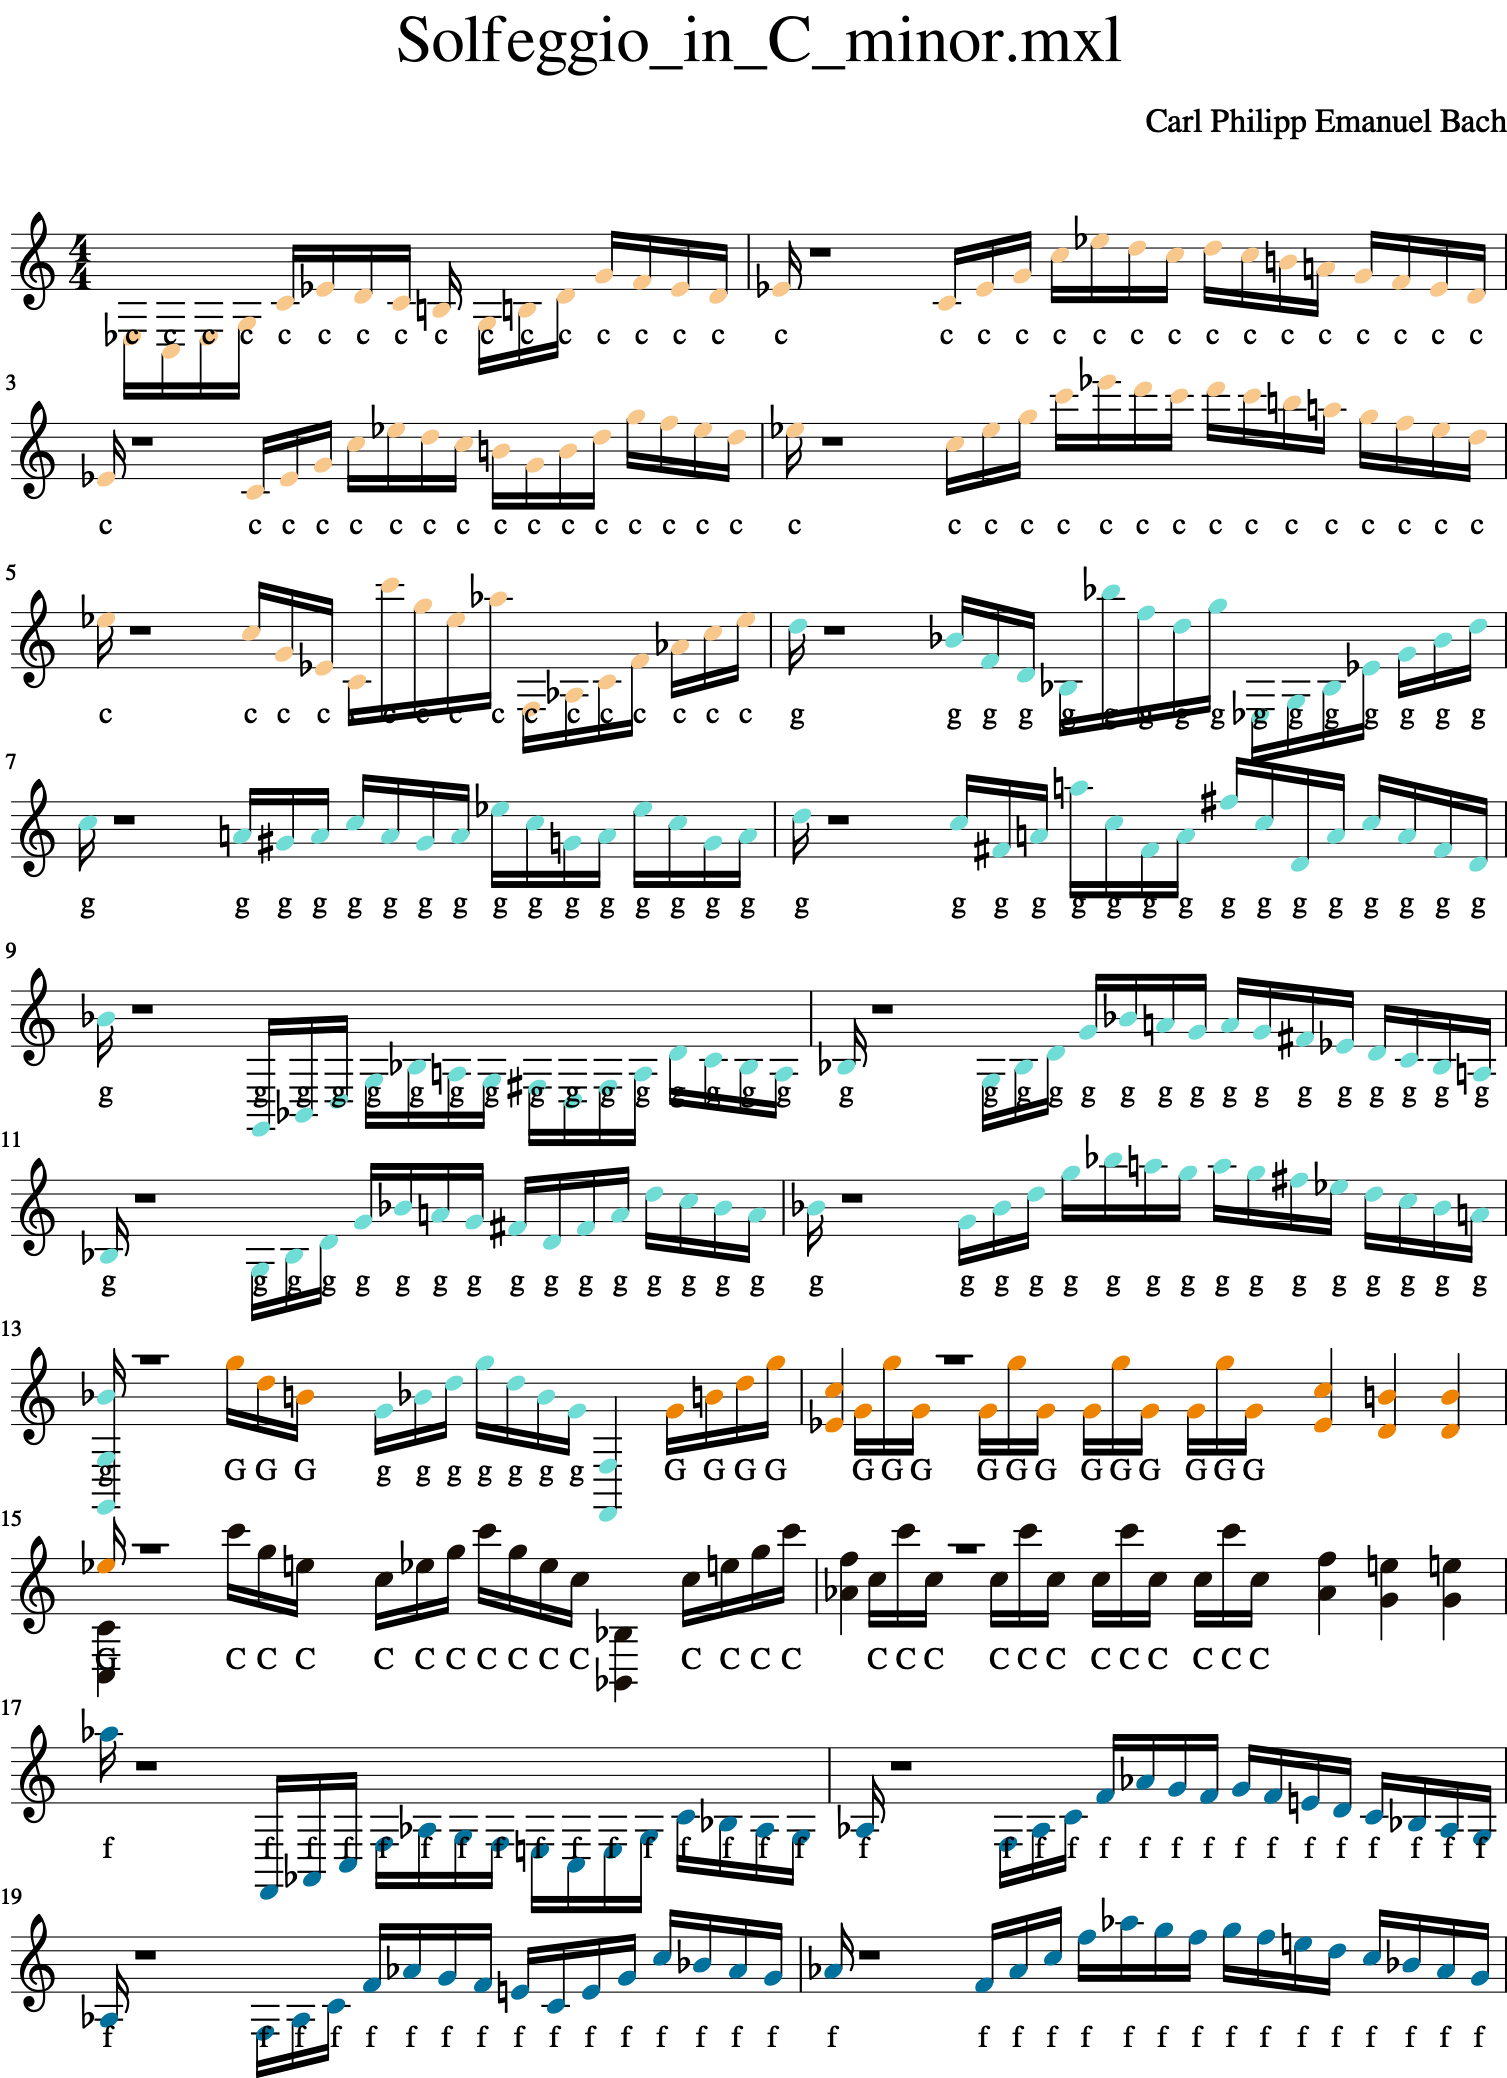

In [33]:
for idx, n in enumerate(notes):
    n.addLyric(local_keys[idx])
    n.style.color = colors[local_keys[idx]]
notes_chords_and_rests.show()